In [31]:
import numpy as np
import pandas as pd
import math
import random
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge

from sklearn import ensemble  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neural_network import MLPRegressor 

In [32]:
#from google.colab import files
#files.upload()

**DataSet**
We took a dataset of 1855 datapoints to analyze different models and evaluate their performance.


In [33]:
iowa_file_path = './complete_timeseries_dataset.csv'

df = pd.read_csv(iowa_file_path,index_col = 0)
iowa_file_path = './players_raw.csv'

players_raw = pd.read_csv(iowa_file_path,index_col = 0)

In [34]:
Teams = {
"Arsenal" : "1",
"Aston Villa" : "2",
"Brighton" : "3",
"Burnley" : "4",
"Chelsea" : "5",
"Crystal Palace" : "6",
"Everton" : "7",
"Fulham" : "8",
"Leicester" : "9",
"Leeds" : "10",
"Liverpool" : "11",
"Man City" : "12",
"Man Utd" : "13",
"Newcastle" : "14",
"Sheffield Utd" : "15",
"Southampton" : "16",
"Spurs" : "17",
"West Brom" : "18",
"West Ham" : "19",
"Wolves" : "20",
}
  
df["team"] = df["team"].map(Teams)
df.iloc[1].was_home

False

In [35]:
players_raw = players_raw.astype({'id':'string'})
mydict = dict(zip(players_raw.web_name, players_raw.id))
c=0
mydict['Aguero']=2000
mydict['De Breuyne']=2001
mydict['H. Barnes']=2002
mydict['Martinez']=2003
mydict['Richarlisson']=2004
mydict['TAA']=2005
mydict['LLoris']=2006

for index,row in df.iterrows():
  id = mydict[row["name"]]
  df._set_value(index,'name',id)
  
df["was_home"] = df["was_home"].astype(int)
df["1_was_home"] = df["1_was_home"].astype(int)
df["2_was_home"] = df["2_was_home"].astype(int)
df["3_was_home"] = df["3_was_home"].astype(int)
df["4_was_home"] = df["4_was_home"].astype(int)
df.iloc[1]
  

name               2000
team                 12
position              3
gameweek              6
total_points          0
                 ...   
4_opp_xpts       1.4646
4_opp_wins            0
4_opp_draws           0
4_opp_loses           1
4_opp_npxGD    -0.71673
Name: 1, Length: 222, dtype: object

**Random Forest Model**

In [36]:
train = df

X = pd.concat([train.iloc[:,[2]], train.iloc[:,5:]], axis = 1)
y = train.iloc[:,4]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [37]:
regr = RandomForestRegressor(oob_score = True, n_estimators = 10000, max_features = 5)

regr.fit(X_train, y_train)
predict_train = regr.predict(X_train)

predict_test = regr.predict(X_test)

In [38]:
out_of_bag_predict = regr.oob_score

residuals = predict_train - y_train
residuals2 = predict_test - y_test
residuals3 = out_of_bag_predict - y_train
mse_train = np.sqrt(sum(residuals**2)/len(residuals))
mse_test = np.sqrt(sum(residuals2**2)/len(residuals2))
mse_out_of_bag = np.sqrt(sum(residuals3**2)/len(residuals3))
abs_train = sum(abs(residuals))/len(residuals)
abs_test = sum(abs(residuals2))/len(residuals2)
abs_out_of_bag = sum(abs(residuals3))/len(residuals3)

In [39]:
print('sqrt(MSE) on train set: ', mse_train)
print('sqrt(MSE) on test set: ', mse_test)
print('Mean Absolute value of residuals on train set: ', abs_train)
print('Mean Absolute value of residuals on test set: ', abs_test)

sqrt(MSE) on train set:  1.3449868584208224
sqrt(MSE) on test set:  3.3969086012423064
Mean Absolute value of residuals on train set:  1.037722413793103
Mean Absolute value of residuals on test set:  2.690915301724137


**Neural Network**

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train2 = scaler.fit_transform(X_train)
X_test2 = scaler.transform(X_test)

neural = MLPRegressor( hidden_layer_sizes  = (100,100,100,100), max_iter = 2000, tol = 0.0001, n_iter_no_change = 10000,)

In [41]:
neural_fit_train = neural.fit(X_train2, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [42]:
neural_predict_train = neural.predict(X_train2)
neural_predict_test = neural.predict(X_test2)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Points predicted by NNet on train set')

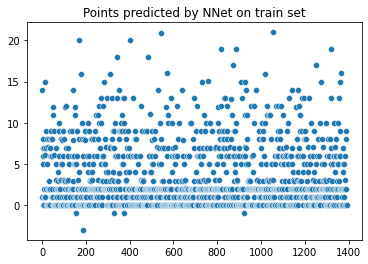

In [43]:
plt.figure()
sns.scatterplot(np.arange(len(neural_predict_train)),neural_predict_train)
plt.title('Points predicted by NNet on train set')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Points predicted by NNet on train set')

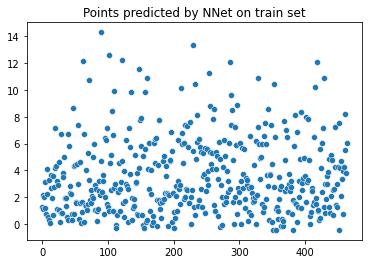

In [44]:
plt.figure()
sns.scatterplot(np.arange(len(neural_predict_test)),neural_predict_test)
plt.title('Points predicted by NNet on train set')

In [45]:
residuals = neural_predict_train - y_train
residuals2 = neural_predict_test - y_test
mse_train = np.sqrt(sum(residuals**2)/len(residuals))
mse_test = np.sqrt(sum(residuals2**2)/len(residuals2))
abs_train = sum(abs(residuals))/len(residuals)
abs_test = sum(abs(residuals2))/len(residuals2)

In [46]:
print('sqrt(MSE) on train set: ', mse_train)
print('sqrt(MSE) on test set: ', mse_test)
print('Mean Absolute value of residuals on train set: ', abs_train)
print('Mean Absolute value of residuals on test set: ', abs_test)

sqrt(MSE) on train set:  0.01385293593265606
sqrt(MSE) on test set:  4.066043782674357
Mean Absolute value of residuals on train set:  0.009358496145142474
Mean Absolute value of residuals on test set:  2.9652485111472044


**Which model performs better?**
We can clearly see that Neural Network based model performs worse than Random Forest.

***For Neural Network model:***
sqrt(MSE) on test set:  4.06
Mean Absolute value of residuals on test set:  2.96

***For Random Forest model:***
sqrt(MSE) on test set:  3.39
Mean Absolute value of residuals on test set:  2.69

For test dataset, Random Forest Performs way better than Neural Network.
Let's try different values of alpha and recalculate the parameters.


**Different 'Alpha' values**

In [67]:
alpha = [0.00, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000,10000000]
n = len(alpha)
mse_train = [math.nan for i in range(n)]
mse_test = [math.nan for i in range(n)]
abs_train = [math.nan for i in range(n)]
abs_test = [math.nan for i in range(n)]
for i in range(n):
    Regression = MLPRegressor(alpha = alpha[i], hidden_layer_sizes  = (100,100,100,100), 
                              max_iter = 2000, tol = 0.0001, n_iter_no_change = 10000)
    Regression.fit(X_train2, y_train)
    predict_train = Regression.predict(X_train2)
    predict_test = Regression.predict(X_test2)

    residuals = predict_train - y_train
    residuals2 = predict_test - y_test
    
    mse_train[i] = np.sqrt(sum(residuals**2)/len(residuals))
    mse_test[i] = np.sqrt(sum(residuals2**2)/len(residuals2))
    
    abs_train[i] = sum(abs(residuals))/len(residuals)
    abs_test[i] = sum(abs(residuals2))/len(residuals2)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron

In [68]:
mse_train

[0.003820275999157641,
 0.002429319359254115,
 0.03728592544836283,
 0.10895358921136168,
 0.5712968123085056,
 3.8710610194172315,
 3.8715306852329716,
 3.871076500466037,
 3.8710213702012877,
 3.871021741479451,
 3.8710214992081293]

In [69]:
mse_test

[4.022576501662713,
 4.164329834766828,
 4.063812556891795,
 4.275189255134137,
 4.3466876317046905,
 3.5791042484244118,
 3.577276250163187,
 3.5810899529765803,
 3.579963260109078,
 3.579877995288243,
 3.579913617156534]

Text(0.5, 1.0, 'Performance on train and test set for different penalties')

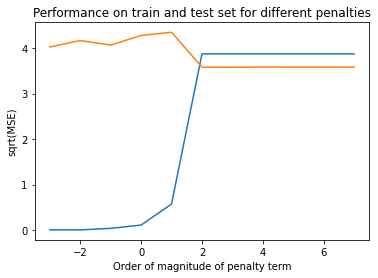

In [70]:
plt.figure()
plt.plot(np.arange(-3, -3 + len(mse_train)), mse_train)
plt.plot(np.arange(-3, -3 +len(mse_test)), mse_test)
plt.xlabel('Order of magnitude of penalty term')
plt.ylabel('sqrt(MSE)')
plt.title('Performance on train and test set for different penalties')

Let's try different normalization

In [51]:
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()

In [52]:
X_train3 = scaler2.fit_transform(X_train)
X_test3 = scaler2.transform(X_test)

neural2 = MLPRegressor( hidden_layer_sizes  = (100,100,100,100), max_iter = 2000, tol = 0.0001, n_iter_no_change = 10000,)

In [53]:
neural2.fit(X_train3, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100), max_iter=2000,
             n_iter_no_change=10000)

In [54]:
neural2_predict_train = neural2.predict(X_train3)
neural2_predict_test = neural2.predict(X_test3)

In [55]:
residuals = neural2_predict_train - y_train
residuals2 = neural2_predict_test - y_test
mse_train = np.sqrt(sum(residuals**2)/len(residuals))
mse_test = np.sqrt(sum(residuals2**2)/len(residuals2))
abs_train = sum(abs(residuals))/len(residuals)
abs_test = sum(abs(residuals2))/len(residuals2)

In [56]:
print('sqrt(MSE) on train set: ', mse_train)
print('sqrt(MSE) on test set: ', mse_test)
print('Mean Absolute value of residuals on train set: ', abs_train)
print('Mean Absolute value of residuals on test set: ', abs_test)

sqrt(MSE) on train set:  0.06352451259507219
sqrt(MSE) on test set:  4.034499987267883
Mean Absolute value of residuals on train set:  0.04100311618796079
Mean Absolute value of residuals on test set:  2.92914734440971


Performance is sightly better than before, but not satisfactory.

In [57]:
neural3 = MLPRegressor( hidden_layer_sizes  = (100,100), max_iter = 20000, tol = 0.0001, n_iter_no_change = 10000,)
neural3.fit(X_train2, y_train)

MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=20000,
             n_iter_no_change=10000)

In [58]:
neural3_predict_train = neural3.predict(X_train2)
neural3_predict_test = neural3.predict(X_test2)

In [59]:
residuals = neural3_predict_train - y_train
residuals2 = neural3_predict_test - y_test
mse_train = np.sqrt(sum(residuals**2)/len(residuals))
mse_test = np.sqrt(sum(residuals2**2)/len(residuals2))
abs_train = sum(abs(residuals))/len(residuals)
abs_test = sum(abs(residuals2))/len(residuals2)

In [60]:
print('sqrt(MSE) on train set: ', mse_train)
print('sqrt(MSE) on test set: ', mse_test)
print('Mean Absolute value of residuals on train set: ', abs_train)
print('Mean Absolute value of residuals on test set: ', abs_test)

sqrt(MSE) on train set:  0.028085061853302198
sqrt(MSE) on test set:  4.167124008882429
Mean Absolute value of residuals on train set:  0.021006081062841606
Mean Absolute value of residuals on test set:  3.089541590334458


Training smaller Neural Network leads to worst performance.

sqrt(MSE) on test set:  4.16
Mean Absolute value of residuals on test set:  3.089